In [1]:
import numpy as np
import pandas as pd
from pyulgresample.ulogdataframe import DfUlg
import matplotlib
from matplotlib import pyplot as plt
%matplotlib notebook

import datetime
import sys 
sys.path.append('/home/lucas/Documents/Log_Analysis')
import payload
import analog
from analog import avghover as avghover, LogError, ishover as ishover, logextract as logextract


# Hovering Review

rpm plot, avg rpm, thrust plot, avg thrust, current time plot (ready to run)

## Rotating speed

In [16]:
# for logs imported with QGC
log_path = '/home/lucas/Documents/Log_Analysis/Logs'
log_index = '39'
log_file = analog.pathfromQGC(log_path,log_index)
print(log_file)

/home/lucas/Documents/Log_Analysis/Logs/log_39_2019-8-27-14-22-40.ulg


In [17]:
avg_hovering = avghover(log_file)
print(f'Average rotating speed when hovering is {avg_hovering["rpm"]} rpm.')

Average rotating speed when hovering is 1566.5181477864583 rpm.


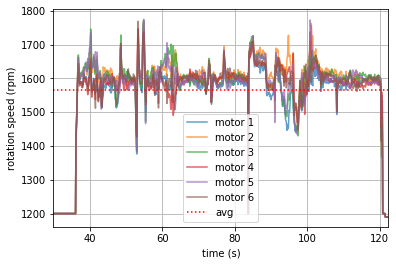

In [18]:
topic_list = ['actuator_outputs','vehicle_local_position_setpoint', 'battery_status']

info = logextract(log_file, topic_list)
time_ao = info['time_ao']
rpm1 = info['rpm'][0]
rpm2 = info['rpm'][1]
rpm3 = info['rpm'][2]
rpm4 = info['rpm'][3]
rpm5 = info['rpm'][4]
rpm6 = info['rpm'][5]


# Figure 1 : Rounds per minutes of the propellers over time
plt.figure()
plt.plot(time_ao,rpm1,label="motor 1",alpha=.7)
plt.plot(time_ao,rpm2,label="motor 2",alpha=.7)
plt.plot(time_ao,rpm3,label="motor 3",alpha=.7)
plt.plot(time_ao,rpm4,label="motor 4",alpha=.7)
plt.plot(time_ao,rpm5,label="motor 5",alpha=.7)
plt.plot(time_ao,rpm6,label="motor 6",alpha=.7)
plt.axhline(avg_hovering['rpm'], label="avg",color='r', linestyle=':')
plt.axis([time_ao[0], time_ao[-1], None, None])
plt.xlabel('time (s)')
plt.ylabel('rotation speed (rpm)')
plt.grid()
plt.legend()
plt.show()

## Thrust

In [19]:
print(f'Average vertical thrust when hovering is {avg_hovering["zthrust"]}.')

Average vertical thrust when hovering is -0.5206190347671509.


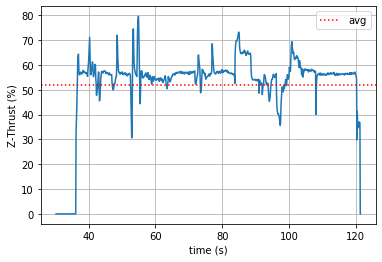

In [20]:
time_vlps = info['time_vlps']
vert_thrust = - info['vert_thrust']*100
# Figure 2 : Vertical thrust over time
plt.figure()
plt.plot(time_vlps, vert_thrust)
plt.axhline(avg_hovering['zthrust']*-100, label="avg",color='r', linestyle=':')
plt.xlabel('time (s)')
plt.ylabel('Z-Thrust (%)')
plt.grid()
plt.legend()
plt.show()


## Current

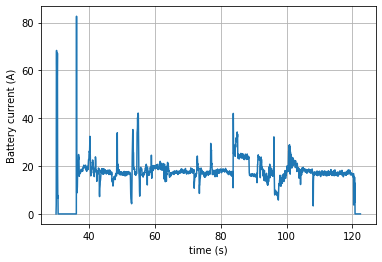

In [21]:
time_bs = info['time_bs']
battery_current = info['battery_current']

# Figure 3 : Battery current over time
plt.figure()
plt.plot(time_bs, battery_current)
plt.xlabel('time (s)')
plt.ylabel('Battery current (A)')
plt.grid()
plt.show()

# Hovering Statistics

### When running this notebook for the first time, you can either : 

In [22]:
paydet = payload.Payload_detecter()

In [23]:
# create a database from a folder (long if many files)
# paydet.create_database(log_path)

In [24]:
# import a database from a csv file (much faster)
paydet.import_database('avg_hover.csv')

## Graphical results

In [25]:
rpm_bins = range(1190,1900,10)

for k in sorted(range(0,len(rpm_bins))):
    if avg_hovering["rpm"] < rpm_bins[k+1]:
        print(k)
        bin_index = k
        break

37


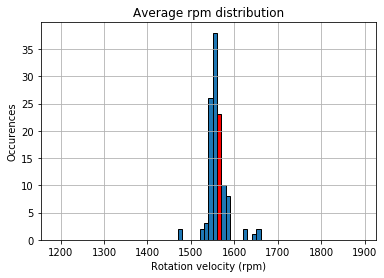

In [26]:
#define RPMMAX 1900 ~30Hz
#define RPMMIN 1200 ~20Hz

color_list = []
for k in range(len(rpm_bins)):
    if k == bin_index :
        color_list.append('r')
    else :
        color_list.append('None')

plt.figure()
pdrpm = pd.Series(paydet.rpm)
hist = pdrpm.plot(kind='hist', bins=rpm_bins,edgecolor='k',title='Average rpm distribution')
plt.grid()
plt.xlabel('Rotation velocity (rpm)')
plt.ylabel('Occurences')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted

## Vertical thrust

In [27]:
step = 1
thrust_bins = range(35,70,1)

for k in range(len(thrust_bins)):
    if -100*avg_hovering["zthrust"] < thrust_bins[k]+step:
        print(k)
        bin_index = k
        break

17


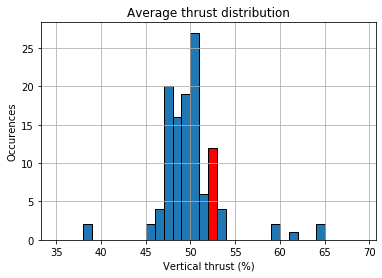

In [28]:
plt.figure()
pdt = pd.Series(paydet.thrust)
hist = pdt.plot(kind='hist', bins=thrust_bins,edgecolor='k',title='Average thrust distribution')
plt.xlabel('Vertical thrust (%)')
plt.ylabel('Occurences')
plt.grid()
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted

In [30]:
if paydet.test_log(log_file): 
    print(f'The drone most likely carried a load during log {log_file}')
else : 
    print(f'The drone was used normally during log {log_file}')

The drone was used normally during log /home/lucas/Documents/Log_Analysis/Logs/log_39_2019-8-27-14-22-40.ulg
